In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math, seaborn
import sklearn.linear_model
import os


%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=False)
#reload(c)

pandas.set_option('display.max_rows', 50)
pandas.set_option('display.max_columns', 50)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0, plusminus=False, function=numpy.mean):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values, statistic=function)
    if numpy.nan in bars:
        return pattern % function(values)
    diff = (bars[1] - bars[0]) / 2
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2))
        diff = round_to_n(diff, 1)
    if plusminus:
        return (pattern + " $\\pm$ " + pattern) % (function(values), diff)
    return (pattern + " (" + pattern + "-" + pattern + ")") % ((function(values),) + bars)

def median_with_errorbars(values, decimals=0, plusminus=False, function=numpy.median):
    return mean_with_errorbars(values, decimals, plusminus, function)


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
cohort_df = pandas.read_csv("../additional-files/Additional File 1.csv")
cohort_df

,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,other snv mutations,other snv neoantigens,other snv expressed neoantigens,snv mutations,snv neoantigens,snv expressed neoantigens,mnv mutations,mnv neoantigens,mnv expressed neoantigens,indel mutations,indel neoantigens,indel expressed neoantigens,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,etoposide,nab-paclitaxel,farletuzumab/placebo
0,AOCS-001-1-7,ICGCDBDE20130916001,AOCS-001-2-0,AOCS_001_ICGC_DBPC_20130205_002,AOCS-001-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...,ICGCDBPC20130205002,SA505244,OV-AU,AOCS-001-1-7,SP101515,AOCS-001-1,DO46325,AOCS-001,1895.0,73.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.335747,0.270605,0.293826,5686.0,104.0,71.0,0.010268,0.016393,0.000000,0.014925,0.131148,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
1,AOCS-004-1-5,ICGCDBDE20130916003,AOCS-004-2-9,AOCS_004_ICGC_DBPC_20130205_004,AOCS-004-1-5,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...,ICGCDBPC20130205004,SA505270,OV-AU,AOCS-004-1-5,SP101519,AOCS-004-1,DO46327,AOCS-004,1350.0,77.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.435291,0.362958,0.519262,6587.0,48.0,20.0,0.008726,0.000000,0.000000,0.029851,0.172414,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
2,AOCS-005-1-8,ICGCDBDE20130916004,AOCS-005-2-1,AOCS_005_ICGC_DBPC_20130205_006,AOCS-005-1-8,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_005_I...,ICGCDBPC20130205006,SA505282,OV-AU,AOCS-005-1-8,SP101521,AOCS-005-1,DO46328,AOCS-005,2128.0,90.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.525860,0.456709,0.373072,5582.0,60.0,36.0,0.005167,0.000000,0.000000,0.033898,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
3,AOCS-034-1-0,ICGCDBLG2010050402TR,AOCS-034-2-4,AOCS_034_ICGC_DBPC_20130205_009,AOCS-034-1-0,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205009,SA505297,OV-AU,AOCS-034-1-0,SP101523,AOCS-034-1,DO46329,AOCS-034,1953.0,84.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.249783,0.223347,0.270322,6858.0,154.0,58.0,0.007520,0.005988,0.016949,0.051020,0.071856,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
4,AOCS-034-3-8,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1597,...,0.371331,0.434420,0.497789,13091.0,259.0,123.0,0.010501,0.003731,0.008065,0.045752,0.029851,0.000000,True,True,True,True,False,True,False,False,False,False,False,False,False
5,AOCS-055-1-7,ICGCDBDE20130916005,AOCS-055-2-0,AOCS_055_ICGC_DBPC_20130205_011,AOCS-055-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_055_I...,ICGCDBPC20130205011,SA505316,OV-AU,AOCS-055-1-7,SP101526,AOCS-055-1,DO46330,AOCS-055,2150.0,82.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.593488,0.512771,0.607863,14583.0,152.0,91.0,0.004165,0.000000,0.000000,0.013423,0.116279,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
6,AOCS-056-1-X,ICGCDBLG2010062229TR,AOCS-056-2-3,AOCS_056_ICGC_DBPC_20130205_013,AOCS-056-1-X,primary tumou

In [61]:
cibersort_df = pandas.read_table("/Users/tim/sinai/git/ovarian-cancer/projects/australian-cohort/patch-cibersort.tsv")
cibersort_df["SampleId"] = cibersort_df.SampleId.map(
    lambda s: s.split("/")[-1]
    .replace("-cufflinks_output-genes.fpkm_tracking", "")
    .split("_")[-1])
merged_df = cohort_df.merge(cibersort_df, left_on="RNA_id", right_on="SampleId", how="outer")
merged_df["T cells"] = merged_df[[x for x in merged_df.columns if x.startswith("T cells")]].sum(1, skipna=False)
merged_df["has_cibersort"] = ~merged_df["T cells"].isnull()
cibersort_merged_df = merged_df.ix[merged_df.has_cibersort]
cibersort_merged_df.shape

(47, 134)

In [44]:
print("\n".join(merged_df.columns))

source_id
RNA_id
RNA biospecimen
DNA_id
DNA_biospecimen
specimen_type_description
CollectionPoint
SpecimenType
RNA data file
DNA_sample_string
icgc_sample_id
project_code
submitted_sample_id
icgc_specimen_id
submitted_specimen_id
icgc_donor_id
submitted_donor_id
analyzed_sample_interval
percentage_cellularity
level_of_cellularity
study
study_specimen_involved_in
specimen_type
specimen_type_other
specimen_interval
specimen_donor_treatment_type
specimen_donor_treatment_type_other
specimen_processing
specimen_storage
tumour_confirmed
tumour_histological_type
tumour_grading_system
tumour_grade
tumour_stage_system
tumour_stage
cohort
donor
tissue_type
timepoint
treated
metastasis
interval_days
bam_filename_tumor_dna
bam_filename_tumor_rna
treated_paired
timepoint_paired
protein changing
peptides
expressed peptides
mutations
mutations_per_mb
indel
treatment
specific_treatment
fraction_peptides_expressed
percent_peptides_expressed
Cisplatin Gallus gallus mutations
Cisplatin Gallus gallus neoa

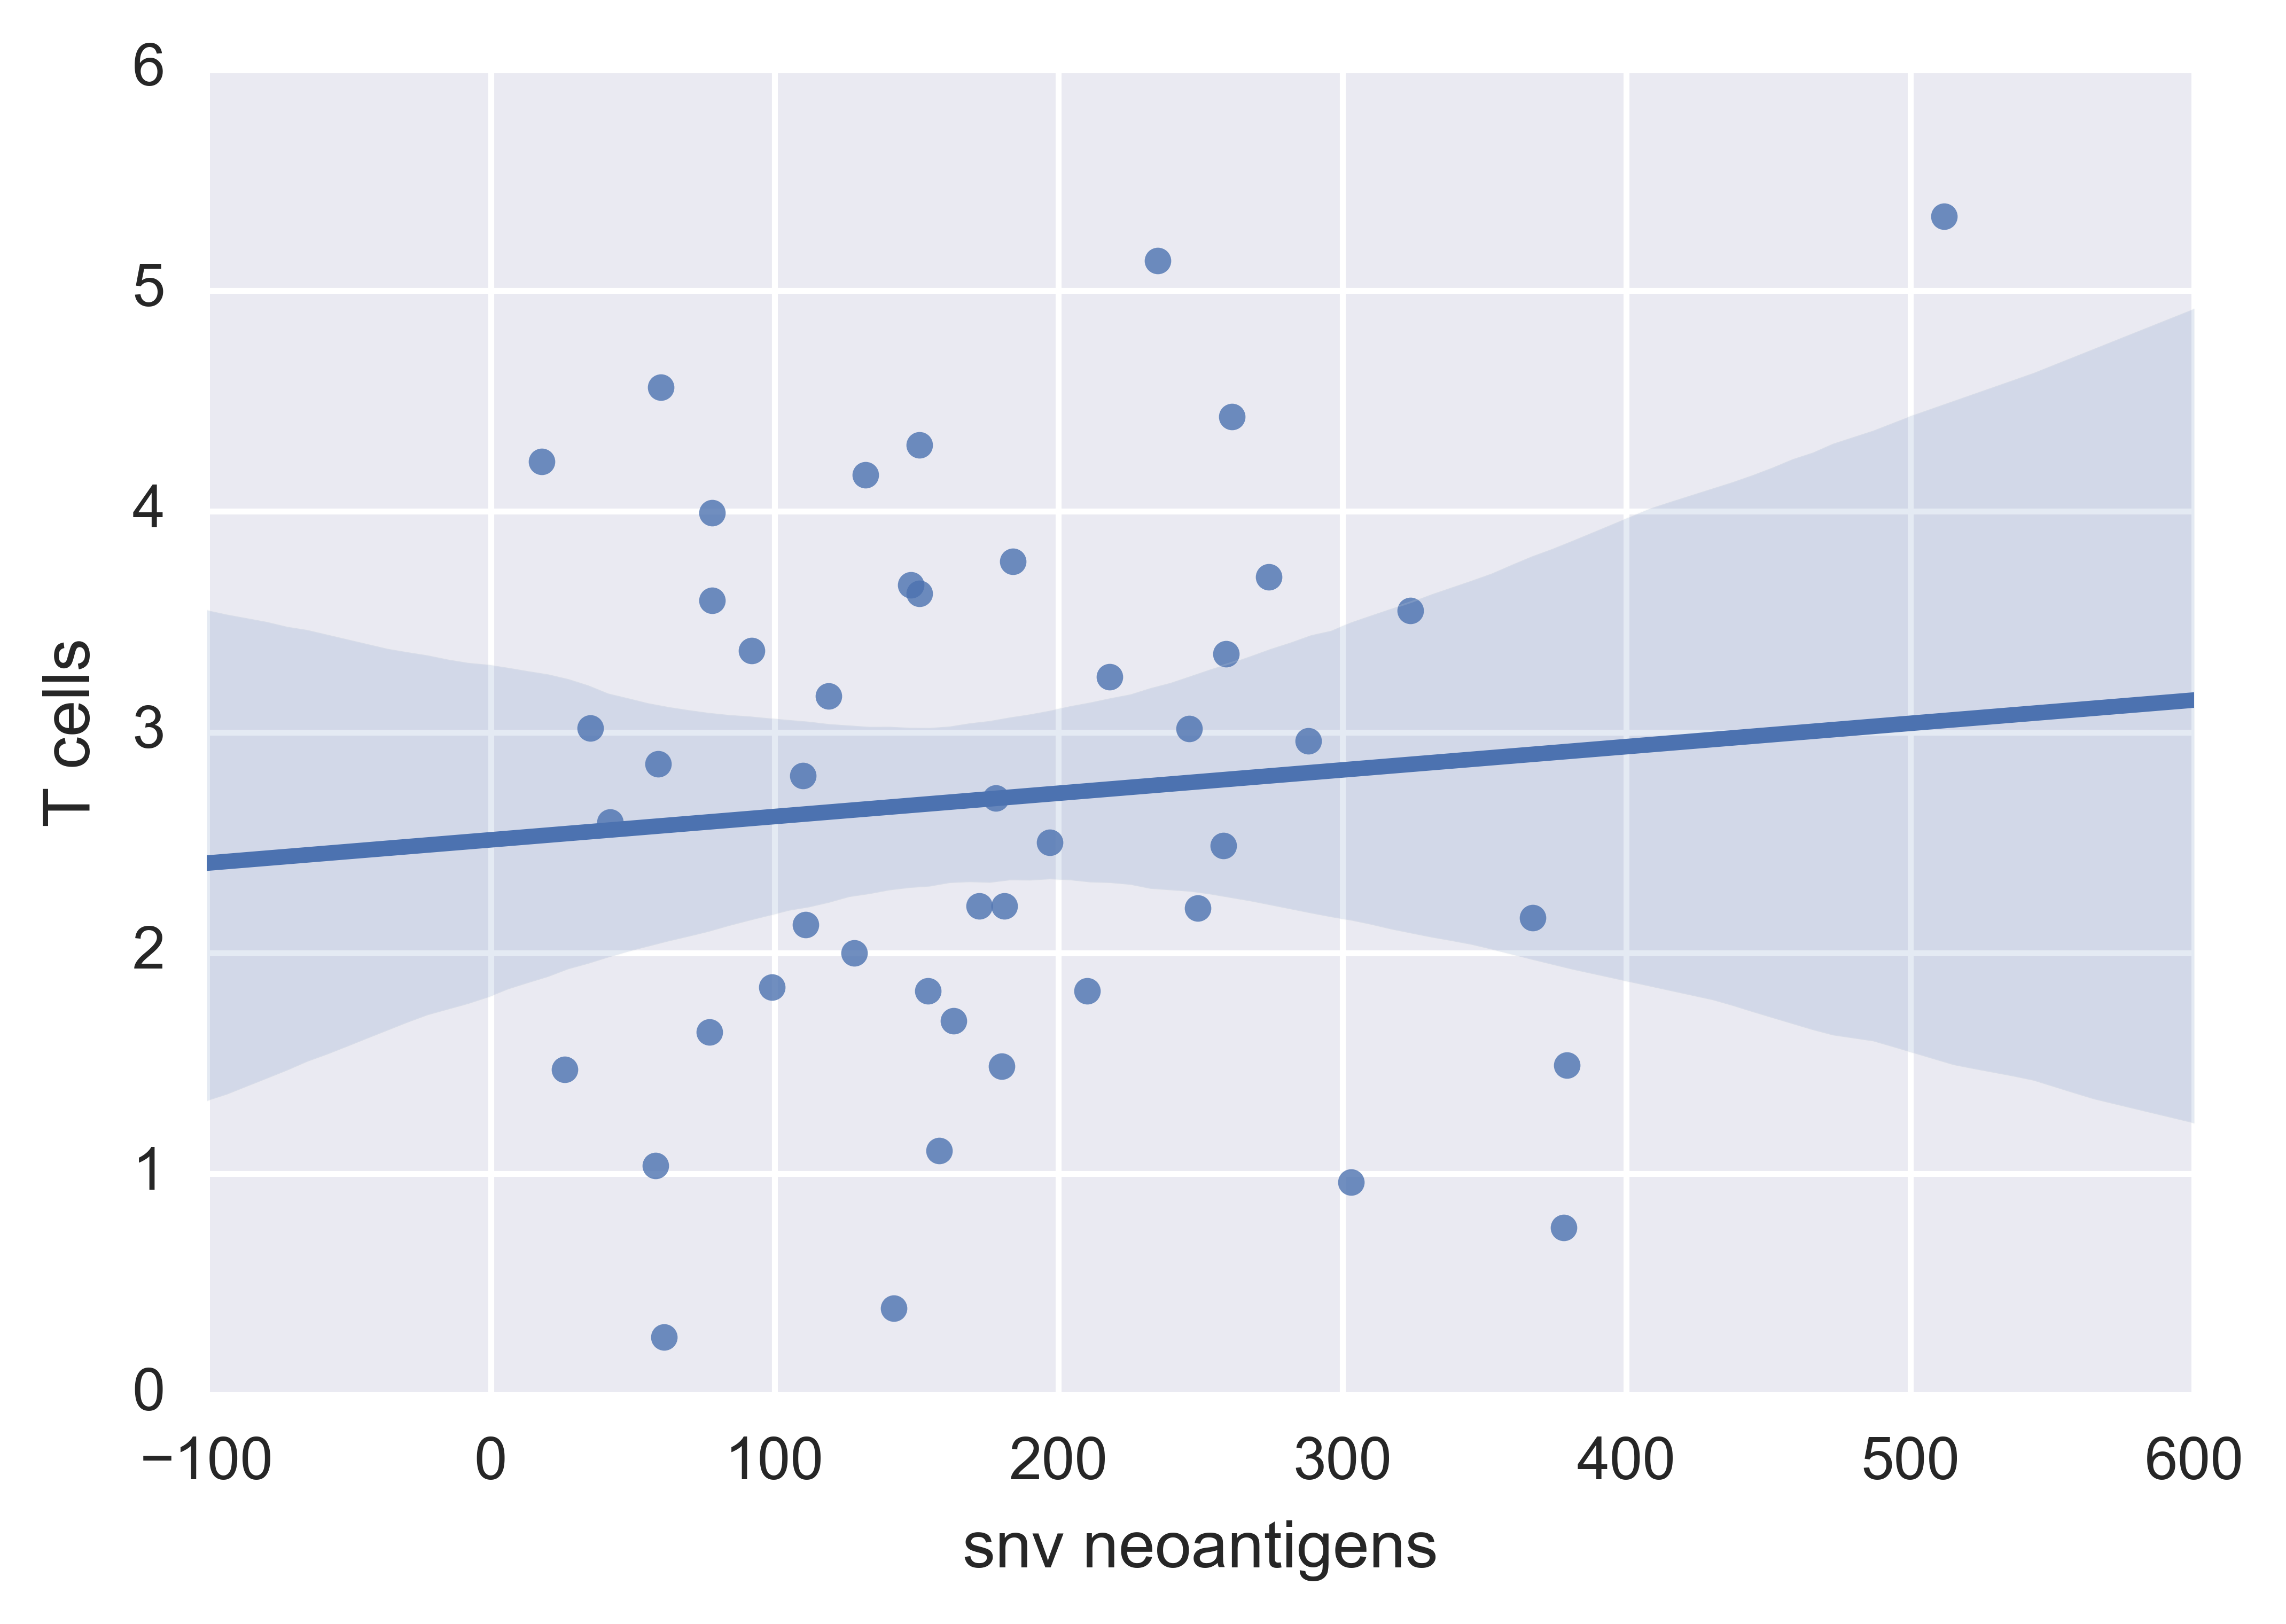

In [40]:
seaborn.regplot(
    data=merged_df,
    x="snv neoantigens",
    y="T cells",
)

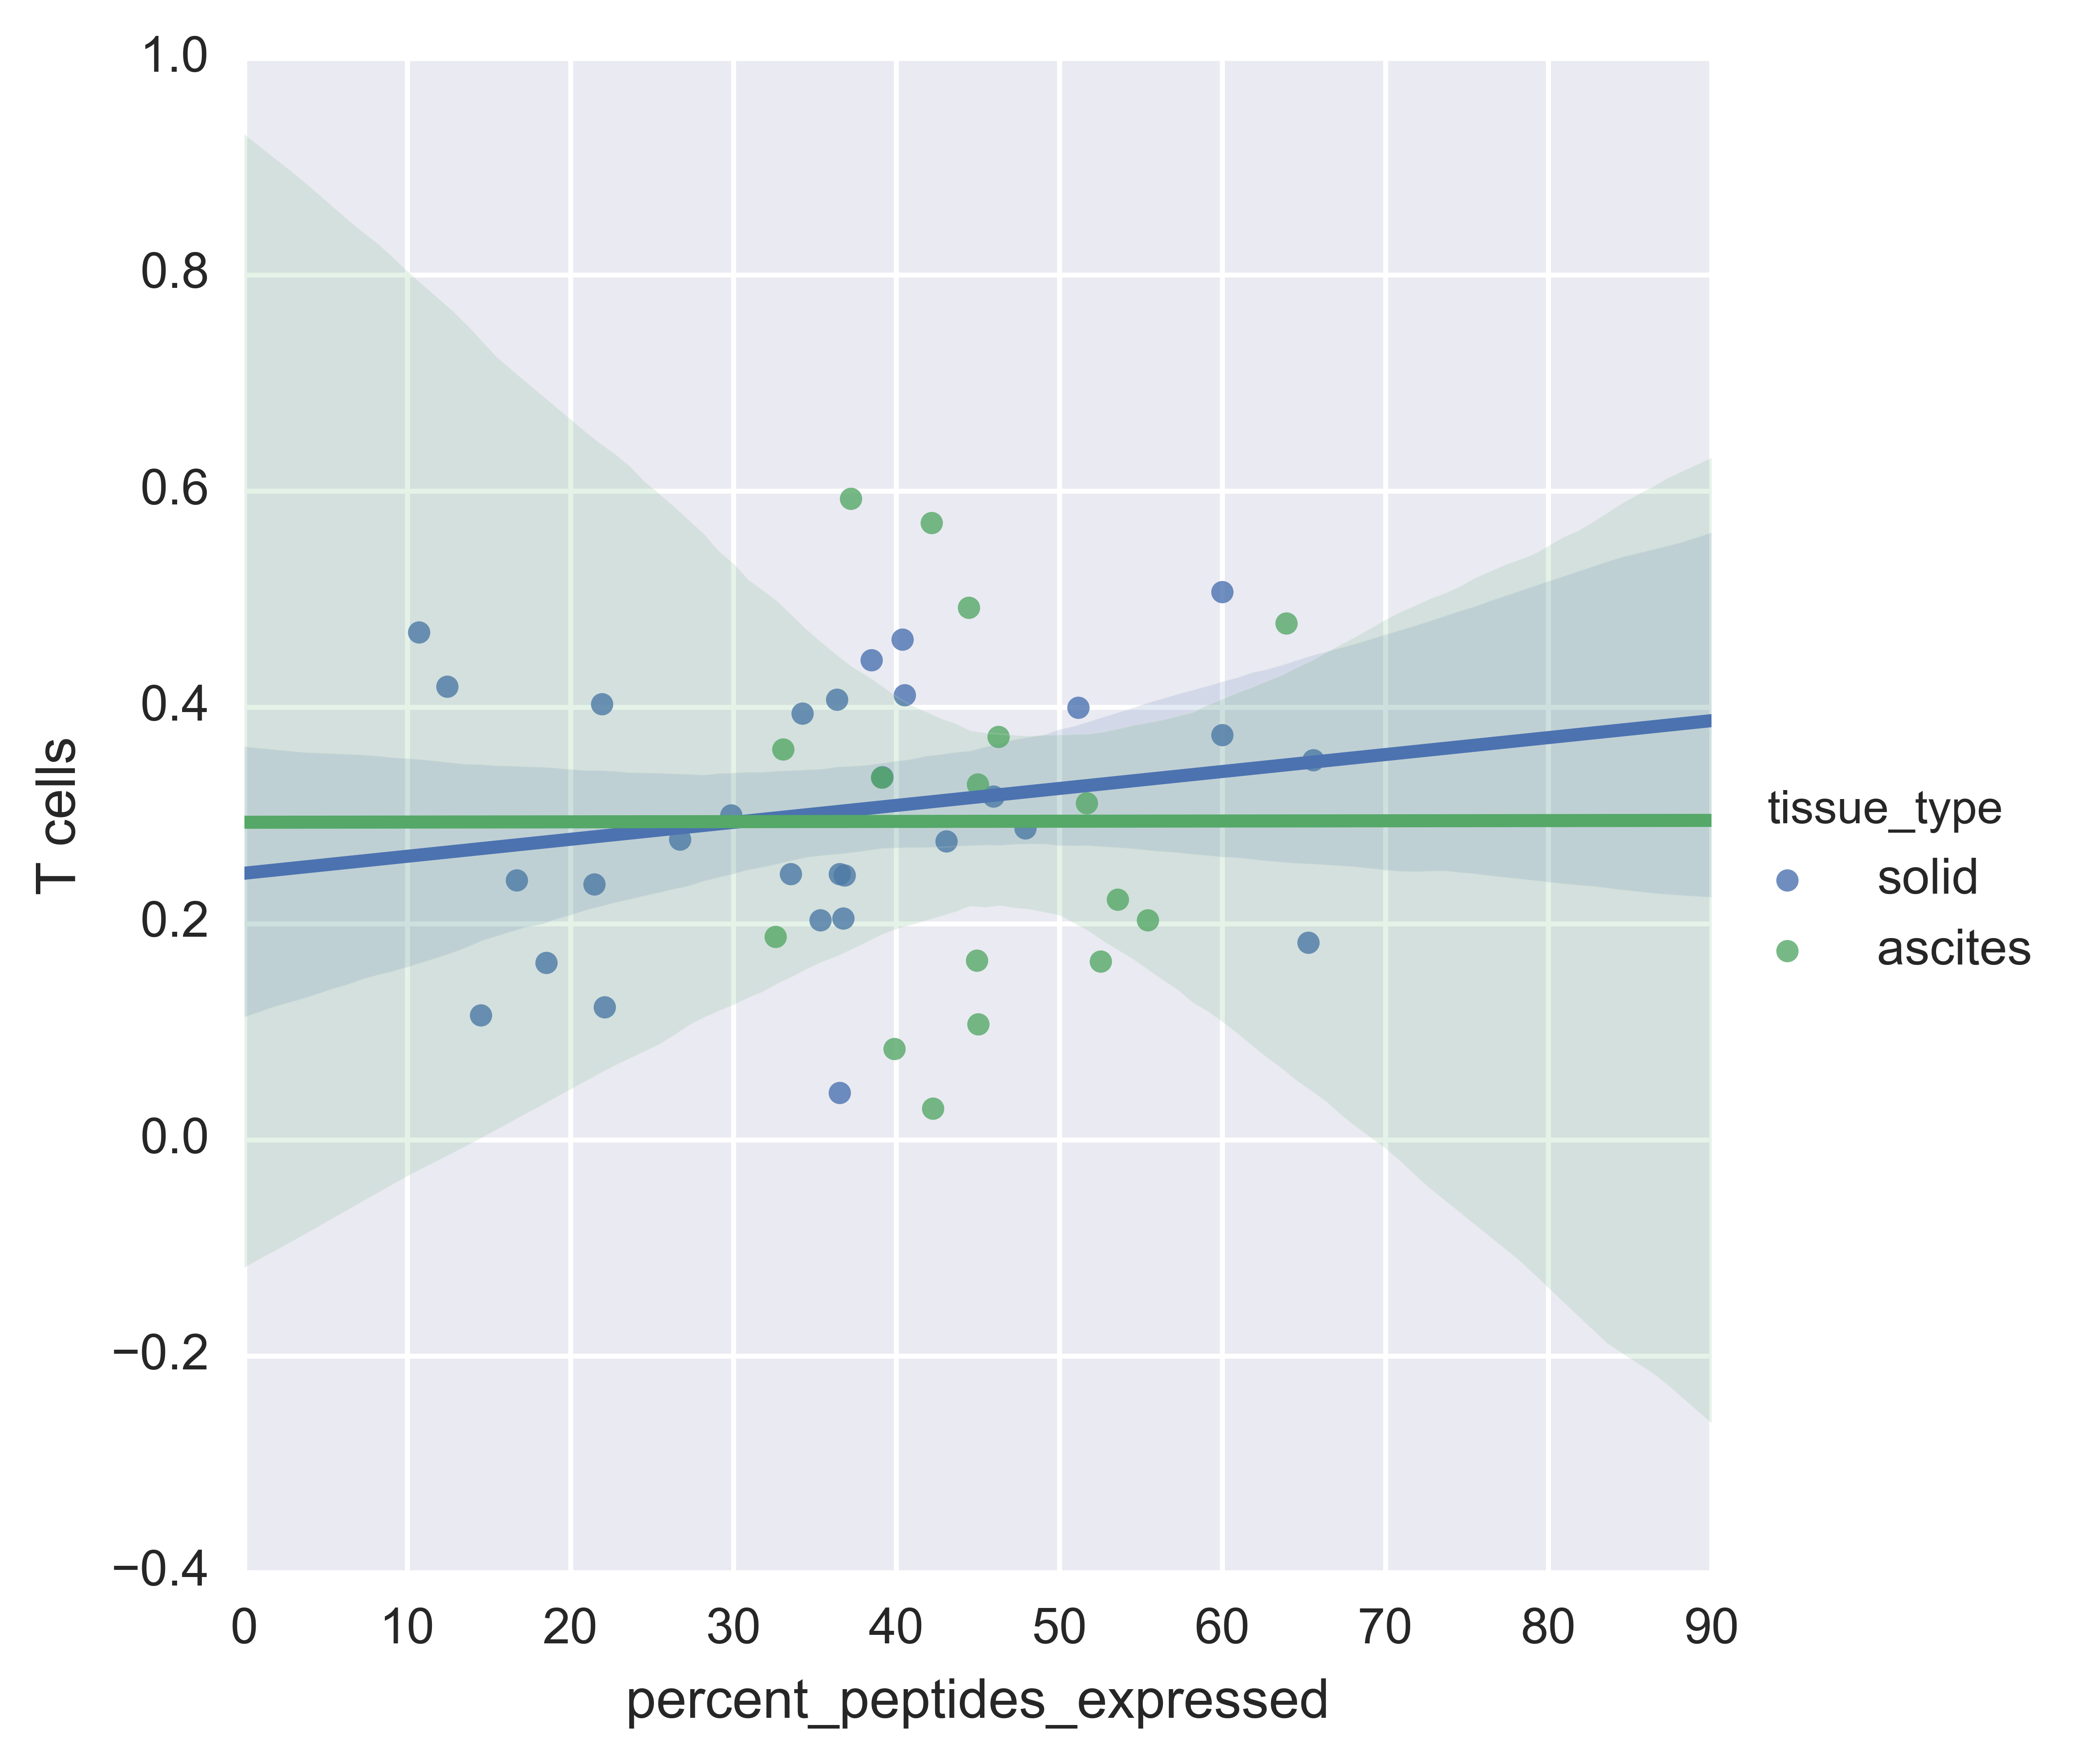

In [91]:
seaborn.lmplot(
    data=merged_df,
    x="percent_peptides_expressed",
    y="T cells",
    hue="tissue_type",
)

#merged_df["snv neoantigens"]

In [86]:
paired_relapse_ascites = merged_df.ix[
    merged_df.treated_paired &
    (merged_df.specific_treatment == "relapse/treated") &
    (merged_df.tissue_type == "ascites")
].copy()
paired_relapse_ascites

,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,NK cells resting,NK cells activated,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Pearson Correlation,RMSE,Unnamed: 26,T cells,has_cibersort
4,AOCS-034-3-8,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1597,...,0.000000,0.000000,0.289878,0.000000,0.030784,0.052124,0.000000,0.016956,0.062349,0.023119,0.039546,0.000497,0.000000,0.0,0.124602,0.024558,0.000000,0.011241,0.000000,0.89,-0.025741,1.123432,NaN,0.372786,True
14,AOCS-064-3-3,ICGCDBLG2010062215FR,AOCS-064-4-7,AOCS_064_ICGC_DBPC_20130205_026,AOCS-064-3-3,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0043_AC29RDACXX.nopd.AOCS_064_IC...,ICGCDBPC20130205026,SA505424,OV-AU,AOCS-064-3-3,SP101554,AOCS-064-13,DO46342,AOCS-064,85.0,99.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1301,...,0.003863,0.000000,0.501668,0.000000,0.038632,0.048769,0.000000,0.114138,0.000000,0.017524,0.025262,0.000000,0.000000,0.0,0.000000,0.000000,0.083938,0.041076,0.000000,1.00,-0.056215,1.151663,NaN,0.592932,True
16,AOCS-065-3-6,ICGCDBLG2010062220FR,AOCS-065-4-X,AOCS_065_ICGC_DBPC_20130607_008,AOCS-065-3-6,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_065_IC...,ICGCDBPC20130607008,SA505446,OV-AU,AOCS-065-3-6,SP101560,AOCS-065-13,DO46344,AOCS-065,933.0,96.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,420,...,0.006067,0.000000,0.148088,0.000000,0.157374,0.000000,0.000000,0.038530,0.000000,0.146424,0.220887,0.260993,0.000000,0.0,0.000000,0.000000,0.014040,0.000000,0.000000,0.01,0.231768,1.020570,NaN,0.311530,True
28,AOCS-086-3-2,ICGCDBLG2010102759FR,AOCS-086-4-6,AOCS_086_ICGC_DBPC_20130205_050,AOCS-086-3-2,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0043_AC29RDACXX.nopd.AOCS_086_IC...,ICGCDBPC20130205050,SA505600,OV-AU,AOCS-086-3-2,SP101606,AOCS-086-13,DO46366,AOCS-086,14.0,84.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,2009,...,0.000000,0.000000,0.044378,0.000000,0.031708,0.000000,0.007957,0.000000,0.029472,0.071838,0.000000,0.000000,0.040475,0.0,0.059251,0.000000,0.680714,0.005847,0.000640,0.01,0.398574,1.018432,NaN,0.084042,True
30,AOCS-088-3-8,ICGCDBLG2010102761FR,AOCS-088-4-1,AOCS_088_ICGC_DBPC_20130701_005,AOCS-088-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0044_AC2JWTACXX.nopd.AOCS_088_IC...,ICGCDBPC20130701005,SA505620,OV-AU,AOCS-088-3-8,SP101612,AOCS-088-13,DO46368,AOCS-088,60.0,100.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,2712,...,0.000000,0.041226,0.192644,0.095112,0.000000,0.000000,0.000000,0.122983,0.000000,0.000000,0.041627,0.000000,0.000000,0.0,0.072983,0.159663,0.000000,0.012298,0.000000,0.96,-0.031935,1.097749,NaN,0.328981,True
33,AOCS-091-3-0,ICGCDBDE20131122026,AOCS-091-4-4,AOCS_091_ICGC_DBPC_20130205_056,AOCS-091-3-0,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_091_IC...,ICGCDBPC20130205056,SA505663,OV-AU,AOCS-091-3-0,SP101624,AOCS-091-13,DO46372,AOCS-091,482.0,76.0,61-80%,NaN,NaN,Recurrent tumour - other,recurrent 

In [85]:
matched = merged_df.ix[
    merged_df.treated_paired &
    (merged_df.specific_treatment == "primary/untreated") &
    (merged_df.tissue_type == "solid")
].groupby("donor")["expressed peptides"].median()
matched

donor
AOCS-034     59
AOCS-064     72
AOCS-065     60
AOCS-086     28
AOCS-088     63
AOCS-091    156
AOCS-092     23
AOCS-093     62
AOCS-094    134
AOCS-095     66
AOCS-139    149
Name: expressed peptides, dtype: int64

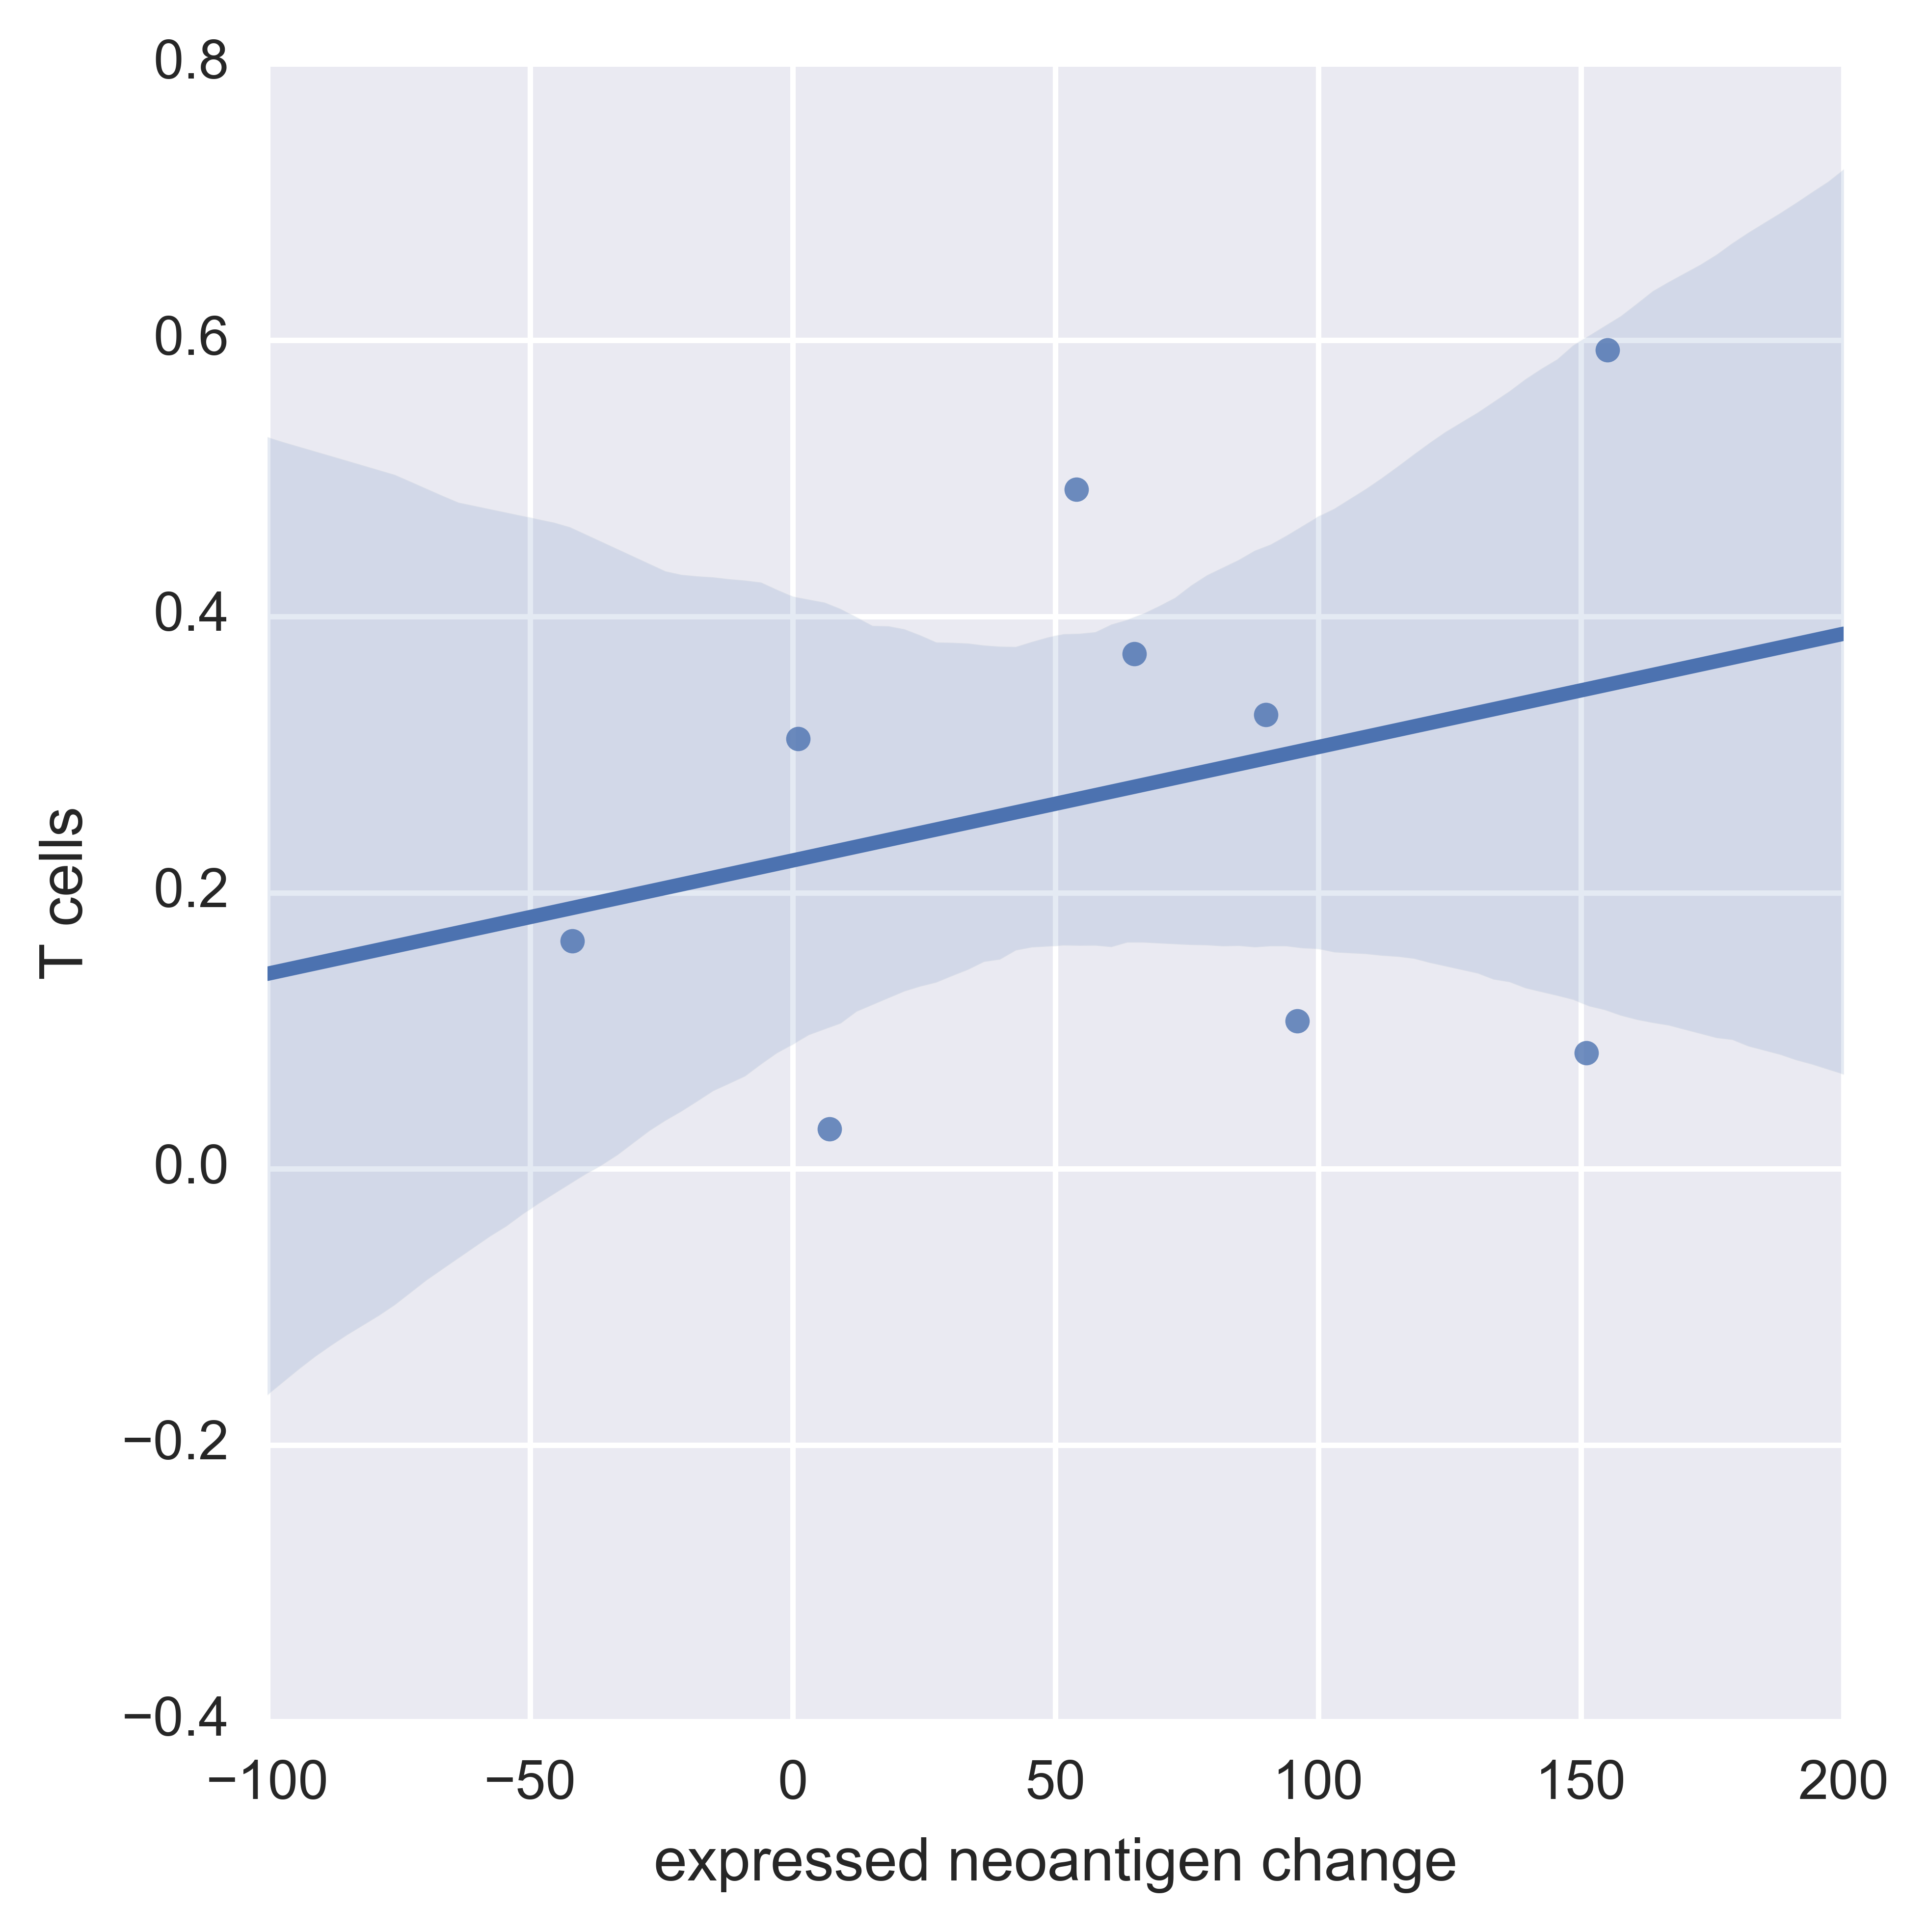

In [89]:
paired_relapse_ascites["pre_treatment_expressed_neoantigens"] = paired_relapse_ascites.donor.map(matched)
paired_relapse_ascites["expressed neoantigen change"] = paired_relapse_ascites["expressed peptides"] - paired_relapse_ascites["pre_treatment_expressed_neoantigens"]

seaborn.lmplot(
    data=paired_relapse_ascites,
    x="expressed neoantigen change",
    y="T cells",
)

In [69]:
cibersort_merged_df.ix[]

(47, 134)

In [63]:
cibersort_merged_df.groupby(["specific_treatment", "tissue_type", "treated_paired"]).donor.count()

specific_treatment  tissue_type  treated_paired
primary/treated     solid        False              1
primary/untreated   ascites      True               2
                    solid        False             17
                                 True              11
relapse/treated     ascites      False              5
                                 True              10
                    solid        True               1
Name: donor, dtype: int64

In [68]:
cibersort_merged_df.tissue_type.value_counts()

solid      30
ascites    17
Name: tissue_type, dtype: int64

In [67]:
merged_df.ix[merged_df.treated_paired & (~merged_df.has_cibersort)]

,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,NK cells resting,NK cells activated,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Pearson Correlation,RMSE,Unnamed: 26,T cells,has_cibersort
77,AOCS-139-12-5,ICGCDBDE20131122037,AOCS-139-24-9MD,AOCS_139_ICGC_DBDE_20130729_002,AOCS-139-12-5,tumour metastasis to distant location 3,Autopsy,Tumour,131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_139_IC...,ICGCDBDE20130729002,SA505491,OV-AU,AOCS-139-12-5,SP101901,AOCS-139-17,DO46493,AOCS-139,95.0,94.0,>81%,NaN,NaN,Metastatic tumour - metastatsis to distant loc...,NaN,920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
78,AOCS-139-19-0,ICGCDBDE20131122039,AOCS-139-26-6MD,AOCS_139_ICGC_DBDE_20130729_003,AOCS-139-19-0,tumour metastasis to distant location,Autopsy,Tumour,131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_139_IC...,ICGCDBDE20130729003,SA505498,OV-AU,AOCS-139-19-0,SP101906,AOCS-139-4,DO46493,AOCS-139,103.0,87.0,>81%,NaN,NaN,Recurrent tumour - solid tissue,NaN,920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
79,AOCS-139-6-3,ICGCDBDE20131122041,AOCS-139-7-7MD,AOCS_139_ICGC_DBDE_20130729_001,AOCS-139-6-3,tumour metastasis to distant location 2,Autopsy,Tumour,131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_139_IC...,ICGCDBDE20130729001,SA505517,OV-AU,AOCS-139-6-3,SP101896,AOCS-139-16,DO46493,AOCS-139,95.0,88.0,>81%,NaN,NaN,Metastatic tumour - metastatsis to distant loc...,NaN,920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


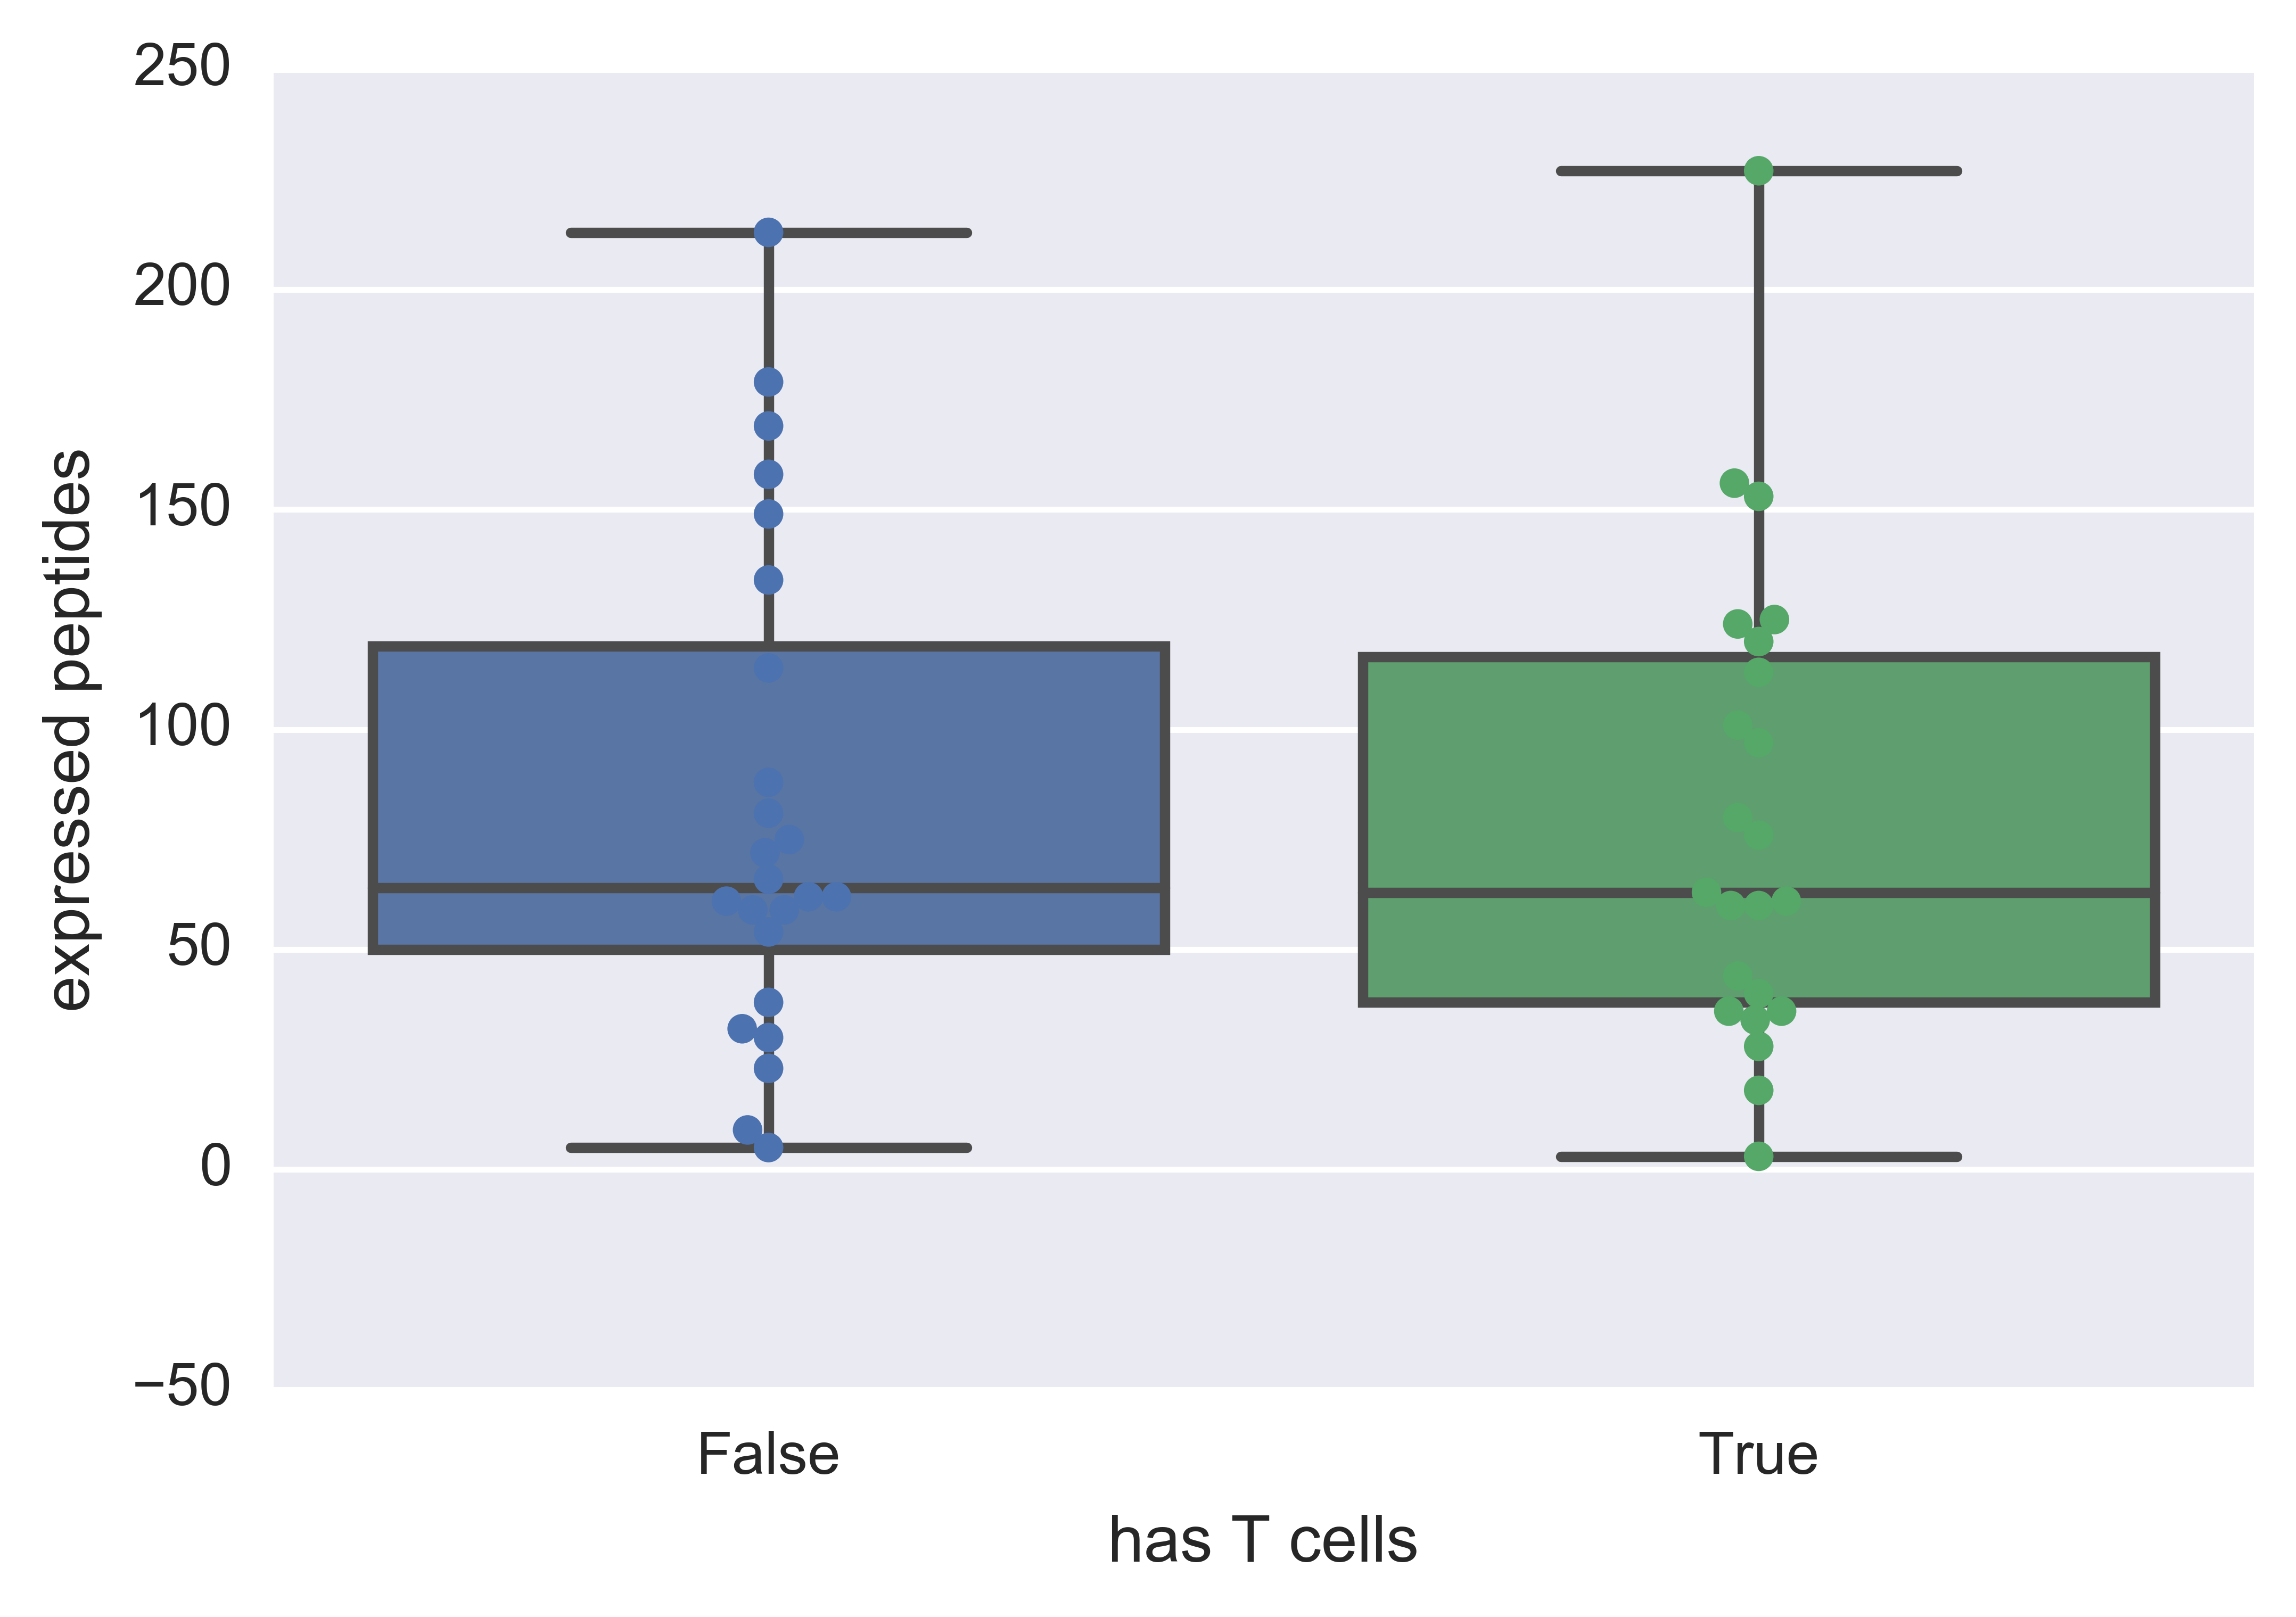

In [54]:
merged_df["has T cells"] = merged_df["T cells"] > merged_df["T cells"].median()
seaborn.boxplot(data=merged_df.ix[~merged_df["T cells"].isnull()], x="has T cells", y="expressed peptides")
seaborn.swarmplot(data=merged_df.ix[~merged_df["T cells"].isnull()], x="has T cells", y="expressed peptides")
